In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load Data
def load_data():
    """Load all input files."""
    customers = pd.read_csv(r"C:\Users\HP\Downloads\Customers.csv")
    products = pd.read_csv(r"C:\Users\HP\Downloads\Products.csv")
    transactions = pd.read_csv(r"C:\Users\HP\Downloads\Transactions.csv")
    return customers, products, transactions

customers, products, transactions = load_data()

# Preview Data
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       


Customer Profiles:
   CustomerID  TotalValue  Quantity
0      C0001     3354.52        12
1      C0002     1862.74        10
2      C0003     2725.38        14
3      C0004     5354.88        23
4      C0005     2034.24         7
Number of Clusters: 2, DB Index: 0.6292
Number of Clusters: 3, DB Index: 0.7037
Number of Clusters: 4, DB Index: 0.7213
Number of Clusters: 5, DB Index: 0.7579
Number of Clusters: 6, DB Index: 0.8163
Number of Clusters: 7, DB Index: 0.8724
Number of Clusters: 8, DB Index: 0.7993
Number of Clusters: 9, DB Index: 0.8343
Number of Clusters: 10, DB Index: 0.7726

Optimal Number of Clusters: 2


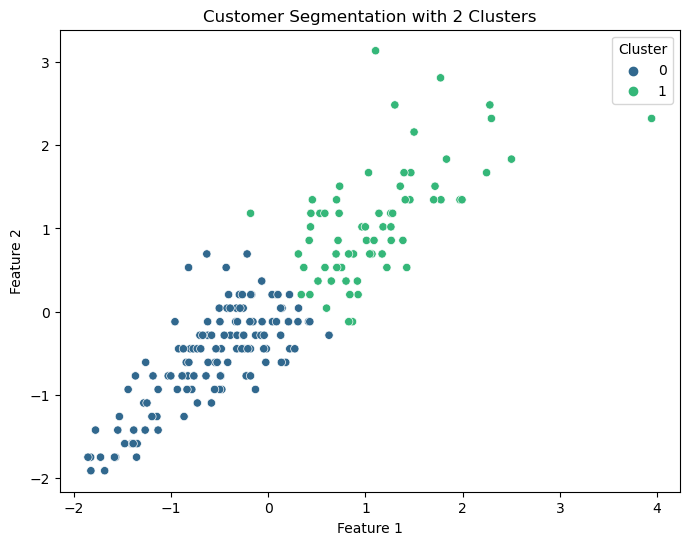


Customer clusters saved to 'Customer_Clusters.csv'.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

def customer_segmentation(customers_csv, transactions_csv):
    # Step 1: Load and Merge Data
    customers = pd.read_csv(customers_csv)
    transactions = pd.read_csv(transactions_csv)

    customers.columns = customers.columns.str.strip()
    transactions.columns = transactions.columns.str.strip()

    merged_data = transactions.merge(customers, on='CustomerID', how='inner')

    # Step 2: Feature Engineering
    customer_profiles = merged_data.groupby('CustomerID').agg({
        'TotalValue': 'sum',    # Total spending
        'Quantity': 'sum',      # Total items purchased
    }).reset_index()

    print("\nCustomer Profiles:\n", customer_profiles.head())

    # Step 3: Normalize Features
    features = customer_profiles.drop(columns=['CustomerID'])
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Step 4: Apply K-Means Clustering
    k_values = range(2, 11)
    db_scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(scaled_features)

        # Calculate DB Index
        db_index = davies_bouldin_score(scaled_features, labels)
        db_scores.append(db_index)

        print(f"Number of Clusters: {k}, DB Index: {db_index:.4f}")

    # Choose the optimal number of clusters (lowest DB Index)
    optimal_k = k_values[np.argmin(db_scores)]
    print(f"\nOptimal Number of Clusters: {optimal_k}")

    # Final Clustering with Optimal k
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    customer_profiles['Cluster'] = kmeans.fit_predict(scaled_features)

    # Step 5: Visualize Clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=scaled_features[:, 0],
        y=scaled_features[:, 1],
        hue=customer_profiles['Cluster'],
        palette="viridis",
        legend="full"
    )
    plt.title(f"Customer Segmentation with {optimal_k} Clusters")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(title="Cluster")
    plt.show()

    # Step 6: Save Results
    customer_profiles.to_csv('Customer_Clusters.csv', index=False)
    print("\nCustomer clusters saved to 'Customer_Clusters.csv'.")

    return customer_profiles, db_scores

# Example Usage
customers_csv = r"C:\Users\HP\Downloads\Customers.csv"
transactions_csv = r"C:\Users\HP\Downloads\Transactions.csv"

# Perform Clustering
customer_profiles, db_scores = customer_segmentation(customers_csv, transactions_csv)
